In [172]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/luke/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [173]:
dtype = torch.FloatTensor

In [174]:
time_steps = 8
input_size = 1
hidden_size = 8
lr=0.02
series = np.linspace(2, 5, time_steps)
sin = np.sin(series)
sin = sin.reshape(time_steps, 1)
x = torch.Tensor(sin[:-1]).type(dtype)
y = torch.Tensor(sin[1:]).type(dtype)

In [175]:
class Net(nn.Module):
    def __init__(self, ):
        super(Net, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, input_size)

    def forward(self, x, h):
       y, h = self.rnn(x,h)
       return self.linear(y), h

In [176]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)
hidden_prev = Variable(torch.zeros(1, 1, hidden_size))

In [177]:
for iter in range(2000):
      i = iter % x.size(0)
      current_y = y[i:(i+1)]
      current_x = x[i:(i+1)]
      inputs, labels = Variable(current_x), Variable(current_y)
      hidden_prev = Variable(torch.zeros(1, 1, hidden_size))
      output, hidden_prev = model(inputs, hidden_prev)
      loss = criterion(output, labels)
      model.zero_grad()
      loss.backward()
      optimizer.step()
      if iter % 100 == 0:
        print("Iteration: {} loss {}".format(iter, loss.data[0]))

Iteration: 0 loss 1.0635732412338257
Iteration: 100 loss 0.011983425356447697
Iteration: 200 loss 0.004236677195876837
Iteration: 300 loss 0.009709722362458706
Iteration: 400 loss 0.0013175669591873884
Iteration: 500 loss 0.00032549755997024477
Iteration: 600 loss 0.001938909525051713
Iteration: 700 loss 0.00035331526305526495
Iteration: 800 loss 0.0005032086628489196
Iteration: 900 loss 0.0015667311381548643
Iteration: 1000 loss 0.003561558434739709
Iteration: 1100 loss 0.0010968598071485758
Iteration: 1200 loss 0.001038520596921444
Iteration: 1300 loss 0.00033847056329250336
Iteration: 1400 loss 0.0002936437667813152
Iteration: 1500 loss 1.5748457371955737e-05
Iteration: 1600 loss 0.004853446967899799
Iteration: 1700 loss 8.295299267047085e-06
Iteration: 1800 loss 0.0009139871690422297
Iteration: 1900 loss 0.0007463382789865136


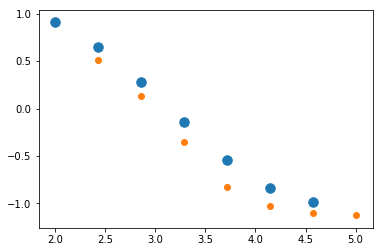

In [178]:
predictions = []
input = Variable(x[0])
for _ in range(x.shape[0]):
  input = input.view(1, 1)
  (pred, hidden_prev) = model(input, hidden_prev)
  input = pred
  hidden_prev = hidden_prev
  predictions.append(pred.data.numpy().ravel()[0])

x = x.numpy()
y = y.numpy()
pl.scatter(series[:-1] , x, s=90)
pl.scatter(series[1:], predictions)
pl.show()
